In [1]:
import sys, os
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

from lib.nn import *

In [2]:
train_dataset = torchvision.datasets.MNIST(
    root='../../data/',
    train=True,
    transform=transforms.ToTensor(),
    download=True
)

test_dataset = torchvision.datasets.MNIST(
    root='../../data/',
    train=False,
    transform=transforms.ToTensor(),
    download=True
)

In [3]:
print(train_dataset.targets.shape)
print(train_dataset.data.shape)

print(test_dataset.targets.shape)
print(test_dataset.data.shape)

torch.Size([60000])
torch.Size([60000, 28, 28])
torch.Size([10000])
torch.Size([10000, 28, 28])


In [4]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

print(device)

cuda


In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [7]:
batch_size = 128

train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset, 
    batch_size=batch_size, 
    shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset, 
    batch_size=batch_size, 
    shuffle=False
)

In [8]:
# color values are now in the range [0, 1] instead of [0, 255]
# thanks to the normalization inside the dataloader

tmp_loader = torch.utils.data.DataLoader(
    dataset=train_dataset, 
    batch_size=1, 
    shuffle=True
)

count = 0
for images, labels in tmp_loader:
    print(images.shape)
    print(labels.shape)
    print(labels)
    print(images)

    count += 1
    if count > 10:
        break

torch.Size([1, 1, 28, 28])
torch.Size([1])
tensor([5])
tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.00

In [9]:
train_losses, test_losses = batch_gd(
    model, criterion, optimizer, train_loader, test_loader, 10, device
)

Epoch 1/10, Train Loss: 0.4195, Test Loss: 0.2235, Duration: 0:00:10.671447
Epoch 2/10, Train Loss: 0.1959, Test Loss: 0.1608, Duration: 0:00:09.949391
Epoch 3/10, Train Loss: 0.1414, Test Loss: 0.1246, Duration: 0:00:09.804557
Epoch 4/10, Train Loss: 0.1096, Test Loss: 0.1095, Duration: 0:00:09.723896
Epoch 5/10, Train Loss: 0.0902, Test Loss: 0.0952, Duration: 0:00:09.660161
Epoch 6/10, Train Loss: 0.0735, Test Loss: 0.0889, Duration: 0:00:09.772401
Epoch 7/10, Train Loss: 0.0620, Test Loss: 0.0855, Duration: 0:00:09.493560
Epoch 8/10, Train Loss: 0.0519, Test Loss: 0.0811, Duration: 0:00:09.654694
Epoch 9/10, Train Loss: 0.0448, Test Loss: 0.0781, Duration: 0:00:09.414434
Epoch 10/10, Train Loss: 0.0390, Test Loss: 0.0749, Duration: 0:00:09.623965


Train accuracy: tensor(0.9930, device='cuda:0')
Test accuracy: tensor(0.9771, device='cuda:0')


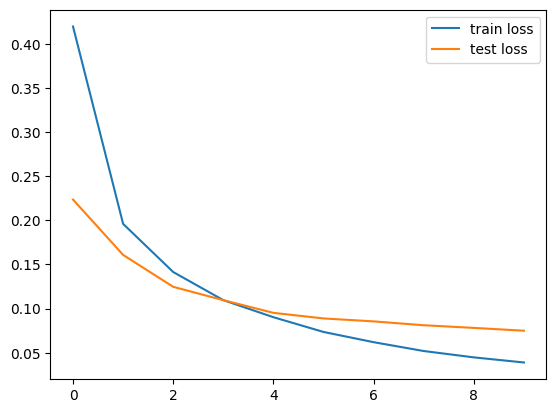

In [10]:
print("Train accuracy:", compute_accuracy(model, train_loader, device))
print("Test accuracy:", compute_accuracy(model, test_loader, device))

plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

Confusion matrix, without normalization


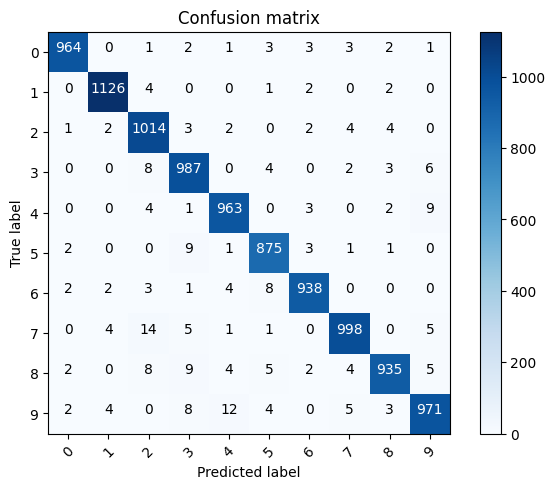

[[ 964    0    1    2    1    3    3    3    2    1]
 [   0 1126    4    0    0    1    2    0    2    0]
 [   1    2 1014    3    2    0    2    4    4    0]
 [   0    0    8  987    0    4    0    2    3    6]
 [   0    0    4    1  963    0    3    0    2    9]
 [   2    0    0    9    1  875    3    1    1    0]
 [   2    2    3    1    4    8  938    0    0    0]
 [   0    4   14    5    1    1    0  998    0    5]
 [   2    0    8    9    4    5    2    4  935    5]
 [   2    4    0    8   12    4    0    5    3  971]]


In [11]:
# get all predictions in an array and plot confusion matrix
cm = get_confusion_matrix(test_loader, model, device)
plot_confusion_matrix(cm, np.unique(test_loader.dataset.targets))
print(cm)

In [12]:
# helper function for handling real-world images

import torch
from PIL import Image, ImageOps
import torchvision.transforms as transforms

def normalize(tensor):
    x, y = tensor.min(), tensor.max()
    return (tensor - x) / (y - x)

def sigmoidal(tensor: torch.Tensor) -> torch.Tensor:
    centered_tensor = tensor - tensor.mean()
    sigmoid_tensor = torch.sigmoid(centered_tensor * 5000)

    return sigmoid_tensor

def load_and_preprocess_image(image_path: str) -> torch.Tensor:
    image = Image.open(image_path)
    image = ImageOps.grayscale(image)
    image = image.resize((28, 28))
    image = ImageOps.invert(image)

    # plt.imshow(image, cmap='gray')
    # plt.axis('off')
    # plt.show()

    transform = transforms.Compose([
        transforms.ToTensor(),
        # transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
    ])

    image_tensor = transform(image)
    image_tensor = sigmoidal(image_tensor)

    # Add a batch dimension (N, C, H, W)
    image_tensor = image_tensor.unsqueeze(0)

    return image_tensor

def view_tensor_image(tensor: torch.Tensor):
    input_tensor = tensor.clone().detach()

    # Remove the batch dimension if it exists
    if input_tensor.dim() == 4:
        input_tensor = input_tensor.squeeze(0)

    # Remove the channel dimension if it exists
    if input_tensor.dim() == 3:
        input_tensor = input_tensor.squeeze(0)

    # Convert the tensor to a NumPy array
    image_array = input_tensor.numpy()

    # Display the image
    plt.imshow(image_array, cmap='gray')
    plt.title('Grayscale Image')
    plt.axis('off')  # Hide the axis
    plt.show()

torch.Size([1, 1, 28, 28])


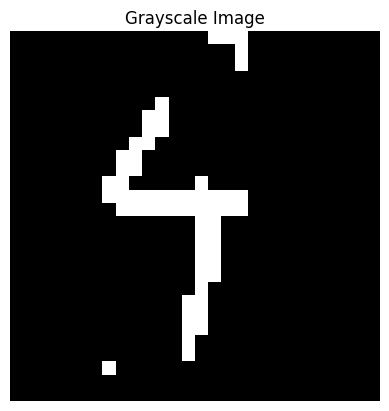

tensor([[    0.000,     0.003,     0.000,     0.001,     0.929,     0.022,
             0.000,     0.001,     0.018,     0.026]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)


In [13]:
model.eval()
torch.set_printoptions(precision=3, sci_mode=False)

input_tensor = load_and_preprocess_image('../../data/mnist_custom/08de4b6e-14e0-4ec6-a16f-ba2c60a66847.jpeg')

# correcting the corrupt white corners
input_tensor[0, 0, 18:28, 18:28] = 0
input_tensor[0, 0, 0:18, 18:28] = 0


print(input_tensor.shape)
view_tensor_image(input_tensor)

outputs = model(input_tensor.to(device))

softfun = nn.Softmax(dim=1)
sigma = softfun(outputs)

print(sigma)

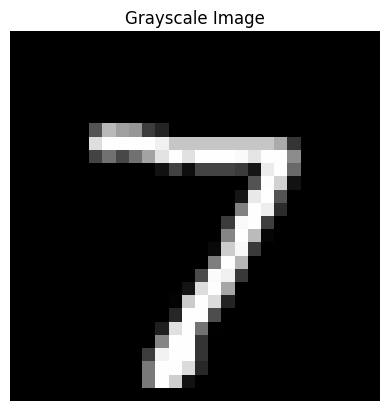

tensor([[    0.000,     0.000,     0.000,     0.000,     0.000,     0.000,
             0.000,     1.000,     0.000,     0.000]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)


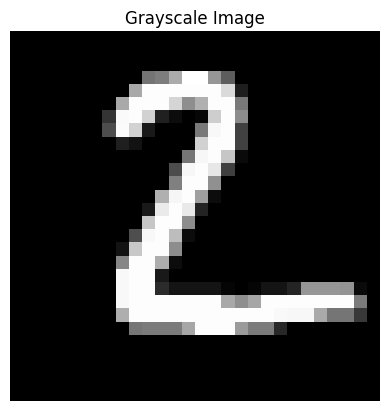

tensor([[    0.000,     0.000,     1.000,     0.000,     0.000,     0.000,
             0.000,     0.000,     0.000,     0.000]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)


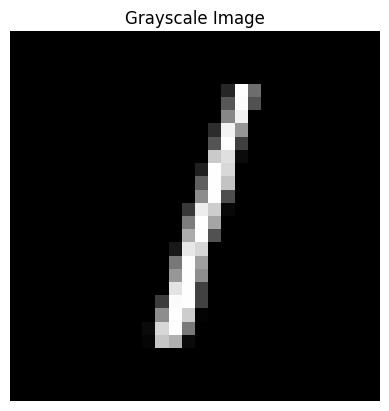

tensor([[    0.000,     0.995,     0.001,     0.000,     0.000,     0.000,
             0.000,     0.001,     0.003,     0.000]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)


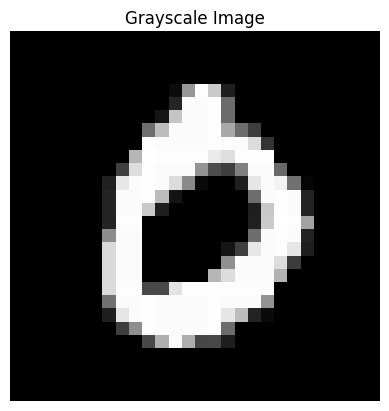

tensor([[    1.000,     0.000,     0.000,     0.000,     0.000,     0.000,
             0.000,     0.000,     0.000,     0.000]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)


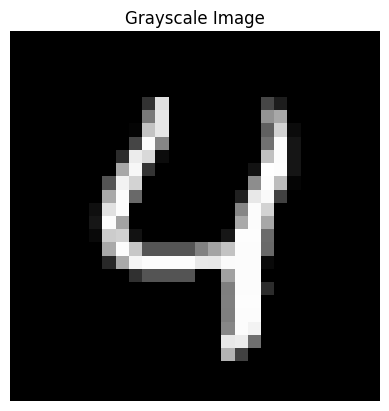

tensor([[    0.000,     0.000,     0.000,     0.000,     0.997,     0.000,
             0.000,     0.000,     0.000,     0.003]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)


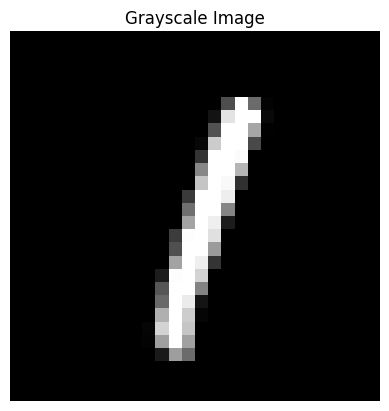

tensor([[    0.000,     0.998,     0.000,     0.000,     0.000,     0.000,
             0.000,     0.002,     0.000,     0.000]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)


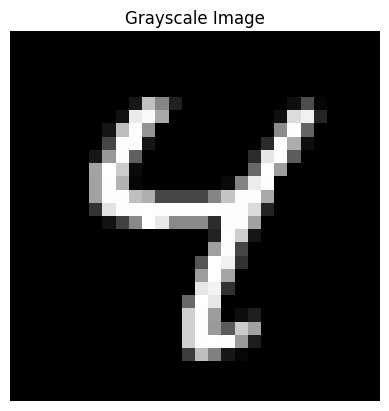

tensor([[    0.000,     0.000,     0.000,     0.000,     0.995,     0.000,
             0.000,     0.000,     0.003,     0.001]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)


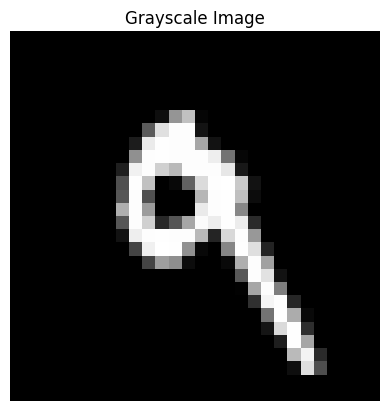

tensor([[    0.000,     0.000,     0.000,     0.000,     0.000,     0.000,
             0.000,     0.000,     0.000,     0.999]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)


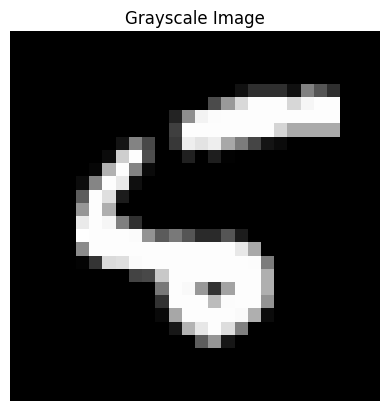

tensor([[    0.000,     0.000,     0.001,     0.000,     0.000,     0.974,
             0.025,     0.000,     0.001,     0.000]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)


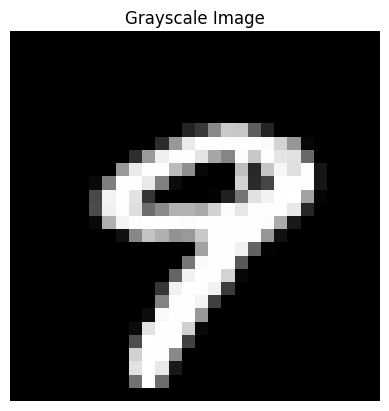

tensor([[    0.000,     0.000,     0.000,     0.000,     0.002,     0.000,
             0.000,     0.000,     0.000,     0.998]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)


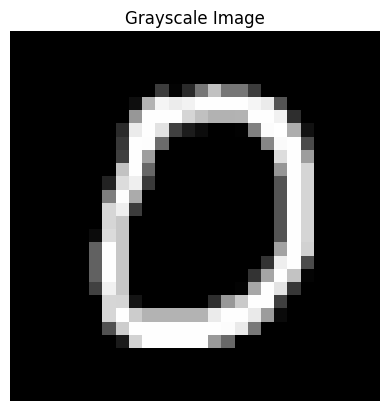

tensor([[    1.000,     0.000,     0.000,     0.000,     0.000,     0.000,
             0.000,     0.000,     0.000,     0.000]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)


In [14]:
tmp_loader = torch.utils.data.DataLoader(
    dataset=test_dataset, 
    batch_size=1, 
)

count = 0
for inputs, targets in tmp_loader:
    view_tensor_image(inputs)

    outputs = model(inputs.to(device))

    softfun = nn.Softmax(dim=1)
    sigma = softfun(outputs)

    print(sigma)

    count += 1
    if count > 10:
        break